**Leduc Holdem**

In [1]:
!pip install rlcard[torch]


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/269.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/269.0 kB ? eta -:--:--
     -- ---------------------------------- 20.5/269.0 kB 330.3 kB/s eta 0:00:01
     ----- ------------------------------- 41.0/269.0 kB 393.8 kB/s eta 0:00:01
     ---------------- ------------------- 122.9/269.0 kB 722.1 kB/s eta 0:00:01
     -------------------------------------- 269.0/269.0 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
   ---------------------------------------- 0.0/207.3 kB ? eta -:--:--
   ---------------------------------------- 207.3/207.3 kB 6.2 MB

In [2]:
import subprocess
import sys
import rlcard
from rlcard.agents import RandomAgent
from rlcard.utils import tournament, Logger, plot_curve

In [3]:
def getGameName(isTexas):
  return "no-limit-holdem" if isTexas else "leduc-holdem"

IS_TEXAS = False
GAME = getGameName(IS_TEXAS)

In [4]:
reqs = subprocess.check_output([sys.executable, "-m", "pip", "freeze"])
installedPackages = [r.decode().split("==")[0] for r in reqs.split()]

if "torch" in installedPackages:
  from rlcard.agents.dqn_agent import DQNAgent as DQNAgent
  from rlcard.agents.nfsp_agent import NFSPAgent as NFSPAgent

In [5]:
from rlcard.agents.cfr_agent import CFRAgent
from rlcard.agents.human_agents.nolimit_holdem_human_agent import HumanAgent as NoLimitHoldemHumanAgent
from rlcard.agents.human_agents.leduc_holdem_human_agent import HumanAgent as LeducHoldemHumanAgent

def getAgent(isTexas):
  return NoLimitHoldemHumanAgent if isTexas else LeducHoldemHumanAgent

In [33]:
env = rlcard.make(GAME, config = {'allow_step_back': True})
print (GAME)
evalEnv = rlcard.make(GAME)

leduc-holdem


In [39]:
agent = RandomAgent(num_actions = env.num_actions)

In [40]:
env.set_agents([agent for _ in range(env.num_players)])
trajectories, playerWins = env.run(is_training = False)

print(trajectories)

[[{'legal_actions': OrderedDict([(1, None), (2, None), (3, None)]), 'obs': array([0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'raw_obs': {'hand': 'HQ', 'public_card': None, 'all_chips': [2, 2], 'my_chips': 2, 'legal_actions': ['raise', 'fold', 'check'], 'current_player': 0}, 'raw_legal_actions': ['raise', 'fold', 'check'], 'action_record': [(1, 'call'), (0, 'fold')]}, 2, {'legal_actions': OrderedDict([(1, None), (2, None), (3, None)]), 'obs': array([0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'raw_obs': {'hand': 'HQ', 'public_card': None, 'all_chips': [2, 2], 'my_chips': 2, 'legal_actions': ['raise', 'fold', 'check'], 'current_player': 1}, 'raw_legal_actions': ['raise', 'fold', 'check'], 'action_record': [(1, 'call'), (0, 'fold')]}], [{'legal_actions': Order

In [41]:
print(playerWins)

[-1.  1.]


In [42]:
cfrAgent = CFRAgent(env, f"experiments/{GAME.replace('-', '_')}_cfr_result/cfr_model")
cfrAgent.load()

In [43]:
evalEnv.set_agents([cfrAgent, RandomAgent(num_actions = env.num_actions)])

In [45]:
import os
import torch

with Logger(f"experiments/{GAME.replace('-', '_')}_cfr_result") as logger:
  for episode in range(1000):
    cfrAgent.train()
    print('\rIteration {}'.format(episode), end = '')

    if episode % 50 == 0:
      logger.log_performance(env.timestep, tournament(evalEnv, 10000)[0])

  csvPath, figPath = logger.csv_path, logger.fig_path

modelOutputPath = os.path.join(logger.log_dir, 'model.path')
torch.save(agent, modelOutputPath)
print(f"Model file saved to: {modelOutputPath}")

Iteration 0
----------------------------------------
  episode      |  194
  reward       |  -0.00135
----------------------------------------
Iteration 50
----------------------------------------
  episode      |  9794
  reward       |  0.6315
----------------------------------------
Iteration 100
----------------------------------------
  episode      |  19394
  reward       |  0.6843
----------------------------------------
Iteration 150
----------------------------------------
  episode      |  28994
  reward       |  0.7408
----------------------------------------
Iteration 200
----------------------------------------
  episode      |  38594
  reward       |  0.76645
----------------------------------------
Iteration 250
----------------------------------------
  episode      |  48194
  reward       |  0.76495
----------------------------------------
Iteration 300
----------------------------------------
  episode      |  57794
  reward       |  0.77095
---------------------------

In [12]:
from rlcard.agents import LeducholdemHumanAgent as HumanAgent

CSV Path:  experiments/leduc_holdem_cfr_result/performance.csv
Fig Path:  experiments/leduc_holdem_cfr_result/fig.png


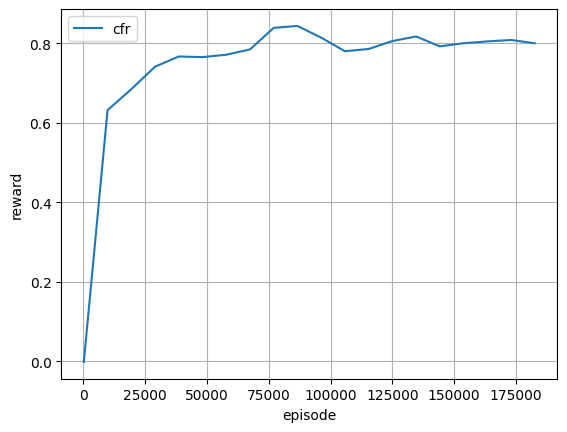

In [46]:
plot_curve(csvPath, figPath, 'cfr')
print("CSV Path: ", csvPath)
print("Fig Path: ", figPath)

In [14]:
agent = RandomAgent(num_actions = env.num_actions)
env.set_agents([agent for _ in range(env.num_players)])

In [15]:
trajectories, playerWins = env.run(is_training = False)

In [16]:
print(trajectories)

[[{'legal_actions': OrderedDict([(0, None), (1, None), (2, None)]), 'obs': array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'raw_obs': {'hand': 'HQ', 'public_card': None, 'all_chips': [1, 2], 'my_chips': 1, 'legal_actions': ['call', 'raise', 'fold'], 'current_player': 0}, 'raw_legal_actions': ['call', 'raise', 'fold'], 'action_record': [(0, 'raise'), (1, 'call'), (0, 'fold')]}, 1, {'legal_actions': OrderedDict([(1, None), (2, None), (3, None)]), 'obs': array([0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), 'raw_obs': {'hand': 'HQ', 'public_card': 'HK', 'all_chips': [4, 4], 'my_chips': 4, 'legal_actions': ['raise', 'fold', 'check'], 'current_player': 0}, 'raw_legal_actions': ['raise', 'fold', 'check'], 'action_record': [(0, 'raise'), (1, 'call'), (0, 'fold')]},

In [17]:
print(playerWins)

[-2.  2.]


In [72]:
def createEnvForUser(game, unloadedAgent):
  env = rlcard.make(game)
  print(game)
  humanAgent = HumanAgent(env.num_actions)
  cfrAgent = unloadedAgent
  cfrAgent.load()
  print(cfrAgent.get_state(0))
  env.set_agents([humanAgent, cfrAgent])
  return env

In [73]:
from rlcard.utils import print_card
from rlcard import models

print(cfrAgent.model_path)
gameEnv = createEnvForUser(getGameName(IS_TEXAS), cfrAgent)
print(cfrAgent.get_state(0))


experiments/leduc_holdem_cfr_result/cfr_model
leduc-holdem
(b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
print(">> Leduc Hold'em pre-trained model")
print(gameEnv.name)
while (True):
    print(">> Start a new game")

    trajectories, payoffs = gameEnv.run(is_training=False)
    # If the human does not take the final action, we need to
    # print other players action
    final_state = trajectories[0][-1]
    action_record = final_state['action_record']
    state = final_state['raw_obs']
    _action_list = []
    for i in range(1, len(action_record)+1):
        if action_record[-i][0] == state['current_player']:
            break
        _action_list.insert(0, action_record[-i])
    for pair in _action_list:
        print('>> Player', pair[0], 'chooses', pair[1])

    # Let's take a look at what the agent card is
    print('===============     CFR Agent    ===============')
    print_card(gameEnv.get_perfect_information()['hand_cards'][1])

    print('===============     Result     ===============')
    if payoffs[0] > 0:
        print('You win {} chips!'.format(payoffs[0]))
    elif payoffs[0] == 0:
        print('It is a tie.')
    else:
        print('You lose {} chips!'.format(-payoffs[0]))
    print('')

    inputs = input("Press any key to continue, Q to exit\n")
    if inputs.lower() == "q":
      break

>> Leduc Hold'em pre-trained model
leduc-holdem
>> Start a new game

=============== Community Card ===============
┌─────────┐
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
└─────────┘
===============   Your Hand    ===============
┌─────────┐
│K        │
│         │
│         │
│    ♥    │
│         │
│         │
│        K│
└─────────┘
===============     Chips      ===============
Yours:   +
Agent 1: ++
=========== Actions You Can Choose ===========
0: call, 1: raise, 2: fold

>> You choose action (integer): 1
>> Player 1 chooses call

=============== Community Card ===============
┌─────────┐
│K        │
│         │
│         │
│    ♠    │
│         │
│         │
│        K│
└─────────┘
===============   Your Hand    ===============
┌─────────┐
│K        │
│         │
│         │
│    ♥    │
│         │
│         │
│        K│
└─────────┘
===============     Chips      ===============
Yours:   ++++
Agent 1: ++++
=========== Actions You Can Cho